# Item Characteristic Curves

This notebook includes code to plot an item characteristic curve (ICC) for a set of user-provided *a*, *b*, and *c* parameters, including or excluding the optional scaling constant, *D*. A brief overview of key concepts follows the demonstration section.

# Demonstration

## Load Dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Provide Item Parameter Values

Provide desired values for *a*, *b*, and *c* item parameters. Provide Boolean ```True``` or ```False``` values to determine if the scaling constant (*D*) will be included (*D* = 1.7 if ```True``` and *D* = 1 if ```False```).

See further below for more details on the meaning of these terms.

In [2]:
a_parm = 2
b_parm = 0.5
c_parm = 0.25
include_d = False

## Create Item Characteristic Curve

The following code creates an item characteristic curve to match the user's provided specifications. Supplemental reference lines are added to illustrate the *a*, *b*, and *c* item parameters. See the "About" section further below for more information.

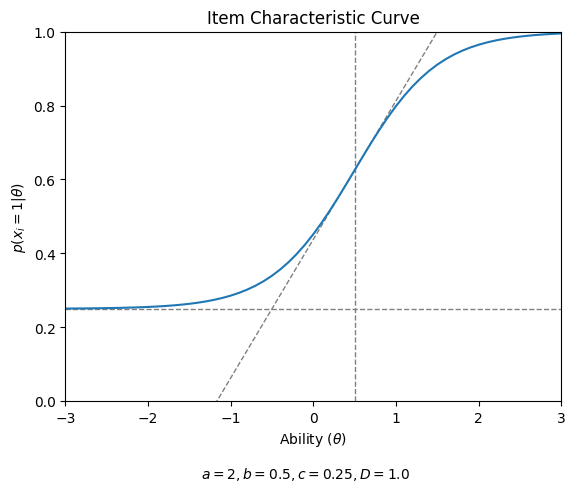

In [3]:
# Set the value of the scaling constant (D)
if include_d:
    d_const = 1.7
else:
    d_const = 1.0

# Define the ICC function
def icc(theta):
    return c_parm + ((1 - c_parm) / (1 + np.exp(-1.0 * d_const * a_parm * (theta - b_parm))))

# Reference line for the a parameter (slope of the ICC at b)
def slope(theta):
    return ((1 + c_parm) / 2) + ((theta - b_parm) * ((d_const * a_parm * (1 - c_parm)) / 4))

# Generate values for the plot
theta_values = np.arange(-3.0, 3.1, 0.1)
p_values = icc(theta_values)
slope_values = slope(theta_values)

# Plot reference lines for the item parameters
plt.plot(theta_values, slope_values, color="gray", linestyle="--", linewidth=1)  # a
plt.axvline(x=b_parm, color="gray", linestyle="--", linewidth=1)  # b
plt.axhline(y=c_parm, color="gray", linestyle="--", linewidth=1)  # c
# Plot the ICC
plt.plot(theta_values, p_values)
plt.xlim(-3.0, 3.0)
plt.ylim(0.0, 1.0)
plt.xlabel(r"Ability ($\theta$)")
plt.ylabel(r"$p(x_i = 1 | \theta)$")
plt.title("Item Characteristic Curve")
plt.figtext(0.5, -0.05, r"$a = {}, b = {}, c = {}, D = {}$".format(a_parm, b_parm, c_parm, d_const), ha="center")
plt.show()

# About Item Characteristic Curves

The **item characteristic curve** (ICC) is a fundamental concept in **item response theory** (IRT), which is the dominant measurement paradigm in modern psychometrics. The ICC is a function that directly relates the test-taker's latent trait, *$\theta$*, (often characterized as the test-taker's **ability** level in the context of achievement testing) to their probability of success on a single test item, with several item parameters determining the shape and location of the ICC. Every item on the test has its own uniquely estimated item characteristic curve.

For a given dichotomously-scored (0, 1) item, $x_i$, the ICC takes the shape of an ogive, or s-shaped curve, with the following formula.

$$
p(x_i = 1 | \theta) = c_i + \frac{1 - c_i}{1 + e^{-Da_i(\theta - b_i)}}
$$

# Item Parameters

Common IRT models used for dichotomous test items include between 1 and 3 item parameters.

## Difficulty (*b*)

In the context of achievement testing, *b* is commonly referred to as the item's **difficulty** parameter, but a more general description is the item's **location**.

The *b* parameter represents the location on the test-taker ability scale that corresponds to the inflection point of the ICC, which occurs at the midpoint between the curve's minimum and maximum probabilities. The *b* item parameter is measured on the same scale as the test-taker ability/trait (*$\theta$*). Both *b* and *$\theta$* are commonly scaled to have a mean of 0 and a standard deviation of 1. Negative values indicate lower difficulty for *b* and lower ability for *$\theta$*, and positive values indicate higher difficulty for *b* and higher ability for *$\theta$*.

## Discrimination (*a*)

Within the context of achievement testing, **discrimination** refers to how well a given test item's score tends to differentiate between low-ability and high-ability test-takers. The *a* parameter measures the **slope** of the ICC at its inflection point, *b*. Sometimes the *a* parameter is multiplied by an optional **scaling constant** (*D* = 1.7) to make the slope of the ICC more closely match a cumulative normal distribution.

### Positive Discrimination

* The ICC has a steep, positive slope. 
* This indicates that test-takers with low ability tend to answer the item incorrectly and test-takers with high ability tend to answer the item correctly. 
* This is a highly desirable characteristic.

### Poor Discrimination

* The ICC has a relatively flat slope. 
* This indicates that test-taker ability does not relate strongly to test-taker performance on this item.
* Items with poor discrimination contribute little meaningful information to infer test-taker ability.

### Negative Discrimination

* The ICC has a negative slope. 
* This indicates that test-takers with low ability tend to answer the item correctly and test-takers with high ability tend to answer the item incorrectly. 
* This usually indicates that an error has occurred in scoring, such as the wrong response option being incorrectly set as the item's key (correct answer).

## Lower Asymptote (*c*)

The probability of success on a given test item theoretically ranges from 0 to 1, but for some item types this assumed range may not be appropriate. For example, a test-taker randomly guessing on a four-option multiple choice item has a probability of success closer to 0.25 than 0, because they have a 1 in 4 chance of guessing the correct answer. In recognition of this, the *c* parameter, which is sometimes referred to as the **pseudo-guessing** parameter, is the model-estimated **lower asymptote** of the ICC.

# Common IRT Models for Dichotomous Items

The **1 parameter logistic (1PL)** or **Rasch** model (so named in honor of early researcher Georg Rasch) is the simplest IRT model. It contains a single item parameter, *b*. Under this model, all items have identical slopes (1) and lower asymptotes (0), but estimated difficulty varies across items.

The **2 parameter logistic (2PL)** model contains both the *b* and *a* item parameters. Under this model, all items have identical lower asymptotes (0), but their difficulties and slopes vary.

The **3 parameter logistic (3PL)** model contains the *b*, *a*, and *c* item parameters, all of which vary across items on the test.
